**<h1>CASO 4</h1>**

![especificaciones](huch.jpeg)


In [1436]:
import pandas as pd
from sklearn.datasets import load_iris

irisdata = load_iris(as_frame=True)

# Convierte irisdata.data en un DataFrame
dfiris = pd.DataFrame(irisdata.data, columns=irisdata.feature_names)

# Ahora, dfiris es un DataFrame de pandas que contiene los datos de California Housing
dfiris.head()

df = irisdata.frame

In [1437]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [1438]:
# Renombra las columnas con guiones bajos en lugar de espacios
df.columns = df.columns.str.replace(' ', '_')

# Verifica los nombres de las columnas
print(df.columns)

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'target'],
      dtype='object')


In [1439]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
df["cat"] = pd.qcut(df['target'], 3 , retbins=False, labels=[1,2,3])
df["cat"]

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: cat, Length: 150, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [1440]:
y = df['cat']
X = df.drop(['cat','target' ,'petal_length_(cm)', 'petal_width_(cm)'], axis = 1)

In [1441]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [1442]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1443]:
X_train


array([[-1.01827123,  1.2864604 ],
       [-0.7730102 ,  2.43545215],
       [-0.03722712, -0.78172474],
       [ 0.20803391,  0.8268637 ],
       [ 1.06644751,  0.13746866],
       [-0.52774918,  1.97585545],
       [-0.52774918,  1.51625875],
       [-0.40511866, -1.47111979],
       [ 0.57592545, -0.55192639],
       [ 0.69855596,  0.13746866],
       [ 0.94381699, -0.09232969],
       [ 1.67960008,  1.2864604 ],
       [-0.15985763, -0.32212804],
       [ 2.17012213, -0.09232969],
       [-0.28248815, -0.09232969],
       [-0.89564072,  1.05666205],
       [ 2.29275265, -0.55192639],
       [-0.03722712, -0.78172474],
       [-0.7730102 ,  0.8268637 ],
       [-1.01827123,  1.05666205],
       [-0.89564072,  1.7460571 ],
       [-1.01827123, -2.39031318],
       [ 0.57592545, -0.78172474],
       [-1.26353226,  0.8268637 ],
       [-1.01827123, -0.09232969],
       [-0.89564072,  0.59706535],
       [-0.28248815, -0.78172474],
       [-0.89564072,  0.8268637 ],
       [-0.15985763,

In [1444]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [1445]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [1446]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.8421052631578947


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.73      0.73      0.73        11
           3       0.75      0.75      0.75        12

    accuracy                           0.84        38
   macro avg       0.83      0.83      0.83        38
weighted avg       0.84      0.84      0.84        38



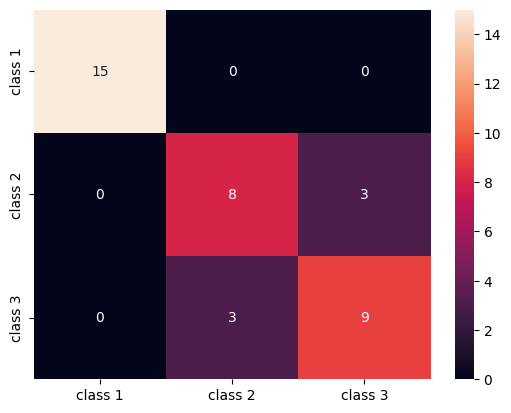

In [1447]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3',]
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

None

 0.8133333333333334


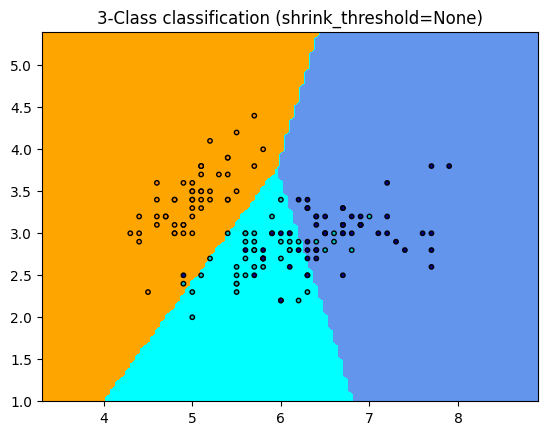

In [1448]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

iris = load_iris()
X = iris.data
y = iris.target
# Suponiendo que X es un DataFrame de pandas
X_2d = X[:, [0, 1]]
y = iris.target

# Suponiendo que X es un DataFrame de pandas
#X_2d = X[['sepal_length_(cm)', 'petal_width_(cm)']].to_numpy()
#y = df["sepal_width_cat"]
# Ahora X_2d será un arreglo NumPy bidimensional con las dos variables seleccionadas
#print(X_2d)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()


In [1449]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

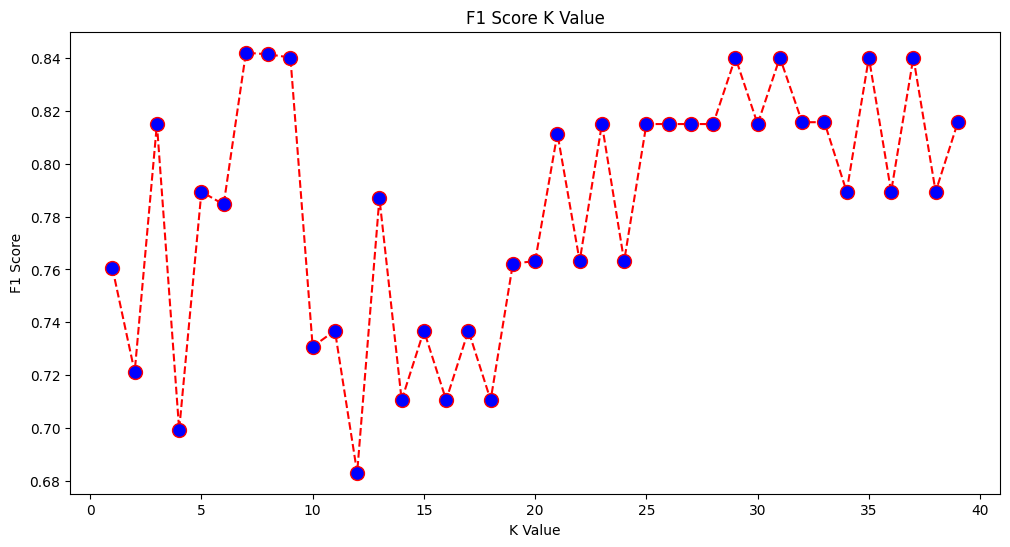

In [1450]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [1451]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.55      0.55      0.55        11
           3       0.58      0.58      0.58        12

    accuracy                           0.74        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.74      0.74      0.74        38



In [1452]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [1453]:
distances[:3], distances.shape

(array([[0.        , 0.12263051, 0.22979835, 0.22979835, 0.26047173],
        [0.        , 0.4337643 , 0.52094347, 0.52094347, 0.70021695],
        [0.        , 0.        , 0.        , 0.22979835, 0.22979835]]),
 (112, 5))

In [1454]:
indexes[:3], indexes[:3].shape


(array([[  0,  94,  50,  19,  90],
        [  1,  33,   5,  40,  76],
        [  2,  35,  17,  48, 110]], dtype=int64),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

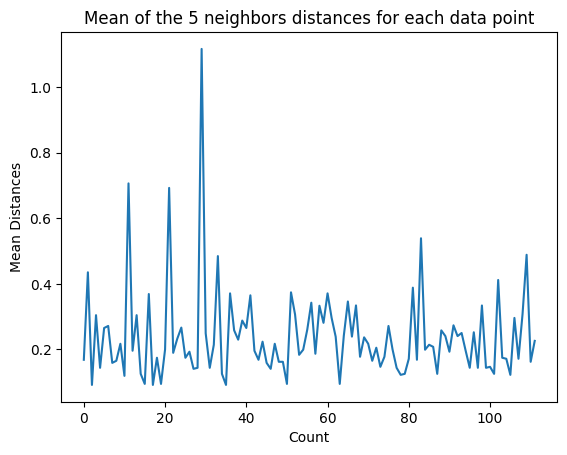

In [1455]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

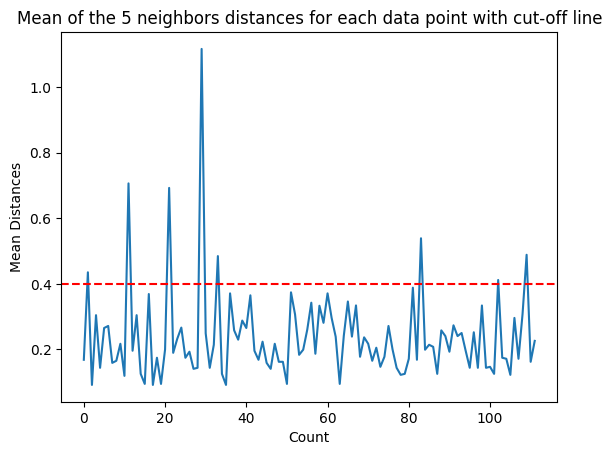

In [1456]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.4, color = 'r', linestyle = '--')

In [1457]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 0.4)
outlier_index


(array([  1,  11,  21,  29,  33,  83, 102, 109], dtype=int64),)

In [1458]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target,cat
1,4.9,3.0,1.4,0.2,0,1
11,4.8,3.4,1.6,0.2,0,1
21,5.1,3.7,1.5,0.4,0,1
29,4.7,3.2,1.6,0.2,0,1
33,5.5,4.2,1.4,0.2,0,1
83,6.0,2.7,5.1,1.6,1,2
102,7.1,3.0,5.9,2.1,2,3
109,7.2,3.6,6.1,2.5,2,3


In [1459]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  